# Differential Drive Robot Forward Kinematics

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def diffDrive(x, y, theta, vr, vl, l, t):
    #Straight Line Trajectory
    if(vr == vl):
        x_n = x + vr*t*np.cos(theta)
        y_n = y + vr*t*np.sin(theta)
        theta_n = theta
    
    #Circular Trajectory    
    else:
        #Instantaneous Center of Curvature (ICC)
        # Let R be the radius from ICC
        # and l be the distance between the wheels
        
        R = (l/2) * ((vr + vl) / (vr - vl))
        
        ICC_x, ICC_y = x - R*np.sin(theta), y + R*np.cos(theta)
        
        #Change in Theta is proportional to the difference between vr and vl
        omega = (vr - vl) / l
        delta_Theta = omega * t
        
        x_n = (x - ICC_x) * np.cos(delta_Theta) - (y - ICC_y) * np.sin(delta_Theta) + ICC_x
        y_n = (x - ICC_x) * np.sin(delta_Theta) + (y - ICC_y) * np.cos(delta_Theta) + ICC_y
        theta_n = theta + delta_Theta
        
    return x_n, y_n, theta_n
    

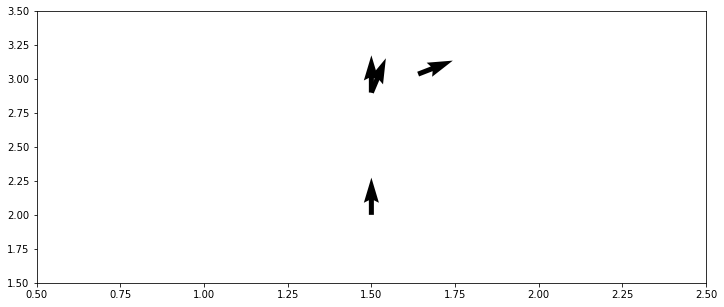

In [18]:
#Assuming distance between the wheels is 0.5m and 
#let the initial pose of the robot be (1.5, 2.0, pi/2)

x, y, theta = 1.5, 2.0, (np.pi)/2
l = 0.5
# plot the starting position
figure = plt.figure(figsize = (12,5))
#plt.gca().set_aspect('equal')
plt.quiver(x, y, np.cos(theta), np.sin(theta))


#Now let a set of steering commands (vr, vl, t) be issued to the robot and calculte and plot its final pose
#Command:I: vl = 0.3m/s, vr = 0.3m/s, t = 3s 

vr, vl, t = 0.3, 0.3, 3
x, y, theta = diffDrive(x, y, theta, vr, vl, l, t)
plt.quiver(x, y, np.cos(theta), np.sin(theta))

#Command:II: vl = 0.1m/s, vr = -0.1m/s, t = 1s 

vr, vl, t = -0.1, 0.1, 1
x, y, theta = diffDrive(x, y, theta, vr, vl, l, t)
plt.quiver(x, y, np.cos(theta), np.sin(theta))

#Command:III: vl = 0.2m/s, vr = 0m/s, t = 2s 

vr, vl, t = 0, 0.2, 2
x, y, theta = diffDrive(x, y, theta, vr, vl, l, t)
plt.quiver(x, y, np.cos(theta), np.sin(theta))

plt.xlim([0.5, 2.5])
plt.ylim([1.5, 3.5])
plt.show()

